## Sea un sistema con 3 procesos y 4 recursos (A,B,C y D). Cada proceso utiliza tres de estos recursos. El primero A, B y C en ese orden. El segundo B, C y D en ese orden. El tercero utliza A, B y D. Analiza cuales de los posibles órdenes de solicitud del tercero pueden generar interbloqueos.


En este notebook trataremos de resolver el problema de forma razonada.
En primer lugar, hemos de calcular las permutaciones de ABD para obtener todos los posibles órdenes de solicitud del tercer proceso.

### Autor: Pedro Henrique Nobre Oliveira - USC

In [10]:
from itertools import permutations #Esta librería nos permite obtener todas las permutaciones de una 
                                   # de caracteres

perms = list(permutations('ABD')) #Nos devuelve un irarator por lo que
                                 #lo casteamos a una lista para visualizarlo directamente.  
print("Permutaciones: {}".format(perms)) 

Permutaciones: [('A', 'B', 'D'), ('A', 'D', 'B'), ('B', 'A', 'D'), ('B', 'D', 'A'), ('D', 'A', 'B'), ('D', 'B', 'A')]


Ahora tenemos que averiguar cuales de estos órdenes pueden originar interbloqueos. Para ello, en primer lugar, hemos de entender lo que es un interbloqueo. Grosso modo, un interbloqueo se produce cuando un proceso bloqueado espera la ocurrencia de un evento para desbloquearse, sin embargo, el sistema no incluye la posibilidad de señalar dicha ocurrencia.

Holt (1972) utilizó grafos dirigidos para representar situaciones de interbloqueo. Estos grafos tienen dos tipos de nodos : procesos, que se representan con círculos, y recursos, representados por cuadrados. Si in proceso está utilizando un recurso, previamente solicitado y concedido, se traza un arco desde el nodo del recurso (cuadrado) hasta el proceso (círculo). En la figura 2, el recurso R está en ese momento asignado al proceso A. En b), el proceso B está solicitando el recurso s. Por último en c) se representa un situación de interbloqueo : el proceso C está a la espera del recurso T, que está asignado al proceso D. El proceso D no ha dejado T, porque está esperando a que quede libre el recurso U, que, a su vez, está siendo utilizado por C. Ambos esperarán indefinidamente.

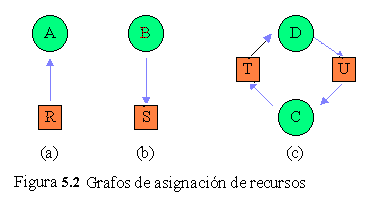

Fuente: http://lsi.vc.ehu.es/pablogn/docencia/manuales/SO/TemasSOuJaen/INTERBLOQUEOS/1y2DefinicionesPreviasyCasosPosibles.htm

Sería, tal vez, interesante comparar esta situación con el problema de los filósofos comelones propuesto por Dijstra en 1965. Si intentamos resolver el problema con un programa que espere hasta que el tenedor derecho esté disponible para cogerlo, todos los filósofos podrían iniciar el algoritmo de forma simultánea, tomando sus tenedores izquierdos a la vez y dando lugar a un situación de inanción total, un interbloqueo, ya que cada uno esperaría una respuesta que nunca llegaría. 

### Dicho esto y cerrando el paréntesis, pasemos a la solución del problema para el que trateremos de utilzar un algortimo que nos lo indique cuáles permutaciones darían lugar a un interbloqueo.

## El algoritmo del banquero. 

#### Ideado por Dijkstra en 1965, es una extensión del algoritmo de detección de interbloqueos.
Pasos que sigue:

1. Buscar un proceso cuya suma recAsig + recDisp >= recMax
2. Suponemos que se asignan dichos recursos y el proceso termina su ejecución. 
   Sumamos sus recursos al vector recDisp y añadimos el proceso a la lista de finalizados.
3. Repetir primer paso hasta terminar todos los procesos (siendo un estado estable)
   o bien hasta el punto en el que no sea posible ninguna asignación de recursos,
   existiendo pues interbloqueo.

Fuente: https://1984.lsi.us.es/wiki-ssoo/index.php/Algoritmo_para_averiguar_interbloqueo
   
Explicación: se trata de verificar la existencia de un estado seguro, esto es, comprobar si existe una secuencia de asignaciones y liberaciones de recursos que permita a todos los procesos alcanzar en algún momento sus necesidades máximas de recursos. Volviendo al grafo del punto anterior, esto esquivale a comprobar si se forma un grafo cerrado (como en la opción c de la figura 5.2). Si no hay liberariones suficientes el proceso se quedará esperando indefinidamente ya pide un recurso que nunca será liberado (no quedarían liberaciones). 


### El algoritmo de detección de interbloqueos:
Fuente: Sistemas opertaivos modernos tanembaum. 

- Es un algortimo basado en matrices.

Estrucuras de datos necesarias:

    -Vector de recursos existentes(E). 
    -Vector de recursos disponibles (A).
    -Matriz de asignaciones actuales (C)
    -La matriz de peticiones(R)

Tanembaum aclara: La i-ésima fila de C nos indica cuántas instancias de cada clase de recurso contiene Pi en un momento dado. Así Cij es el número de instancias del recurso j que están contenidas por el proceso i. De manera similar, Rij es el número de instancias del recurso j que desea Pi. 

### Por tanto, al principio, se dice que cada proceso está desmarcado. A medida que el algoritmo progrese se marcarán los procesos, indicando que pueden completarse y, por ende, no están en interbloqueo. Cuando el algoritmo termine, se sabe que cualquier proceso desmarcado está en interbloqueo. 

1. Buscar un proceso desmarcado, Pi, para el que la i-ésima fila de R sea menor o igual que A.
2. Si se encuentra dicho proceso, agregar la i-ésima fila de C a A, marcar el proceso y regresar al paso 1.
3. Si no existe dicho proceso, el algoritmo termina.

Curiosidad: el algoritmo recibe el nombre de banquero porque su funcionamiento es parecido a la gestión que hacen los bancos con las cuentas de crédito.

# Una posible solución para el problema propuesto

In [82]:
Uno = ['A','B','C']
Dos = ['B', 'C', 'D']
Tres = [list(tupla) for tupla in perms] #Pasamos todas la tuplas a listas por preferencia personal
                                    #No me gusta trabajar con tuplas.
Tres

[['A', 'B', 'D'],
 ['A', 'D', 'B'],
 ['B', 'A', 'D'],
 ['B', 'D', 'A'],
 ['D', 'A', 'B'],
 ['D', 'B', 'A']]

In [83]:
#En el siguiente código implementaré una posible solución para el problema. Todo el razonamiento se encuentra
#matizado en comentario de Sorraylla Ramos Gonzaga. Partiendo de ese razonamiento y con 
#cierta inspiración de los algoritmos vistos en clase he desarrollado el siguiente código:

NR = 4 #Número recursos
NP = 3 #Número procesos

def verificar_inter(Tres):
    Uno = ['A','B','C']
    Dos = ['B', 'C', 'D']
    input = [Uno, Dos, Tres]

    asignados = [['nada' for _ in range(NR)] for _ in range(NP)] #Matriz que marca los recursos asignados, siendo cada
                                                              #fila un proceso con sus NR recursos posibles
                                                              #False si Asiganados y True si está disponible
    necesitados = [[0 for _ in range(NR)] for _ in range(NP)] #Análogo pero en vez de valores booleanos, 
                                                              #aquí mantemos la cuenta de cuanta de los procesos que 
                                                              #requieren cada recurso

    #El primer paso será obtener dos matrices: recursos asignados y necesitados (cada fila representa un proceso)

    for i in range(NP): #Iteramos sobre los procesos
        for j in range(3): #Iteramos sobre las solicitudes de cada proceso - Son tres
            asignado = False
            for k in asignados:
                if (input[j][i] in k): #Verificamos si el recurso ya ha sido asignado anteriormente
                    asignado = True
            if asignado: #Verificamos si el recurso ya ha sido asignado anteriormente
                necesitados[j][i] = input[j][i] 
            else:
                asignados[j][i] = input[j][i] #Cambiamos el 'nada' por la letra - que representa el recurso


    #El segundo paso va a ser encontrar algún ciclo cerrado: 

    contador = 0

    inseguro = [0,0,0]
    for id,p in enumerate(necesitados): #procesos que necesitan un recurso
        for i in p:
            for j in asignados:
                if i in j:
                    inseguro[id] +=1

    for id,p in enumerate(asignados): #procesos tienen el recurso
        for i in p:
            for j in necesitados:
                if i in j:
                    if inseguro[id] >= 1:
                        contador += 1

    print("Necesitados: ", necesitados)
    print("Asignados: ", asignados)
    return contador



In [87]:
for orden in Tres:
    if verificar_inter(orden) > 1: #Mayor que uno ya que un proceso puede esperar por el recurso que tiene otro (se bloquea) 
                                   #si ese otro proceso no depende de un recurso del primero. 
        print("Interbloqueo")
    else:
        print("No interbloqueo")

Necesitados:  [[0, 'B', 'C', 0], [0, 0, 0, 0], ['A', 'B', 'D', 0]]
Asignados:  [['A', 'nada', 'nada', 'nada'], ['B', 'C', 'D', 'nada'], ['nada', 'nada', 'nada', 'nada']]
No interbloqueo
Necesitados:  [[0, 'B', 'C', 0], [0, 0, 'D', 0], ['A', 0, 'B', 0]]
Asignados:  [['A', 'nada', 'nada', 'nada'], ['B', 'C', 'nada', 'nada'], ['nada', 'D', 'nada', 'nada']]
Interbloqueo
Necesitados:  [[0, 'B', 'C', 0], [0, 0, 0, 0], ['B', 'A', 'D', 0]]
Asignados:  [['A', 'nada', 'nada', 'nada'], ['B', 'C', 'D', 'nada'], ['nada', 'nada', 'nada', 'nada']]
No interbloqueo
Necesitados:  [[0, 'B', 'C', 0], [0, 0, 'D', 0], ['B', 0, 'A', 0]]
Asignados:  [['A', 'nada', 'nada', 'nada'], ['B', 'C', 'nada', 'nada'], ['nada', 'D', 'nada', 'nada']]
Interbloqueo
Necesitados:  [[0, 'B', 'C', 0], [0, 0, 'D', 0], [0, 'A', 'B', 0]]
Asignados:  [['A', 'nada', 'nada', 'nada'], ['B', 'C', 'nada', 'nada'], ['D', 'nada', 'nada', 'nada']]
Interbloqueo
Necesitados:  [[0, 'B', 'C', 0], [0, 0, 'D', 0], [0, 'B', 'A', 0]]
Asignados:  